# Testing EfficientNetB4 Model

In [13]:
import sys
sys.path.append(".")
import numpy as np
import glob
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB3
import matplotlib.pylab as plt
from pathlib import Path
from tensorflow.keras import layers
import json
#from PlayingCardsGenerator import CardsDataGenerator
import datetime

In [51]:
json_config_path = 'BEST_MODEL_B4/Efficientnet_B4_model_config.json'
weights_path = 'BEST_MODEL_B4/Efficientnet_B4_it_52_V5_epoch44_weights.h5'
enitre_model_path ='BEST_MODEL_B4/Efficientnet_B4_it_52_V5_epoch44.h5'

In [48]:
model = tf.keras.models.load_model(enitre_model_path)

In [52]:
with open(json_config_path, 'r') as openfile:
    # Reading from json file
    json_config = json.load(openfile)

In [53]:
model = keras.models.model_from_json(json_config)
model.load_weights(weights_path)
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 380, 380, 3)]     0         
                                                                 
 efficientnetb4 (Functional)  (None, 52)               17767059  
                                                                 
Total params: 17,767,059
Trainable params: 17,641,852
Non-trainable params: 125,207
_________________________________________________________________


In [ ]:
# list all data in history
print(history_it.keys())
# summarize history for accuracy
plt.plot(history_it['accuracy'])
plt.plot(history_it['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_it['loss'])
plt.plot(history_it['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [41]:
img_height = 380 #B4
img_width = 380 #B4
bs = 16 # batch size
classes_names = ["2_clubs","2_diamonds","2_hearts","2_spades",\
               "3_clubs","3_diamonds","3_hearts","3_spades",\
               "4_clubs","4_diamonds","4_hearts","4_spades",\
               "5_clubs","5_diamonds","5_hearts","5_spades",\
               "6_clubs","6_diamonds","6_hearts","6_spades",\
               "7_clubs","7_diamonds","7_hearts","7_spades",\
               "8_clubs","8_diamonds","8_hearts","8_spades",\
               "9_clubs","9_diamonds","9_hearts","9_spades",\
               "10_clubs","10_diamonds","10_hearts","10_spades",\
               "ace_clubs","ace_diamonds","ace_hearts","ace_spades",\
               "jack_clubs","jack_diamonds","jack_hearts","jack_spades",\
               "king_clubs","king_diamonds","king_hearts","king_spades",\
               "queen_clubs","queen_diamonds","queen_hearts","queen_spades"]

In [54]:
testgen = ImageDataGenerator()
test_generator = testgen.flow_from_directory(

    directory = 'dataset_test_hard',
    target_size=(img_height, img_width),
    batch_size=bs,
    class_mode="categorical",
    shuffle=False,
    #subset='validation',
    interpolation="nearest",
    classes=classes_names) # set as validation data
filenames = test_generator.filenames
nb_samples = len(filenames)

Found 231 images belonging to 52 classes.


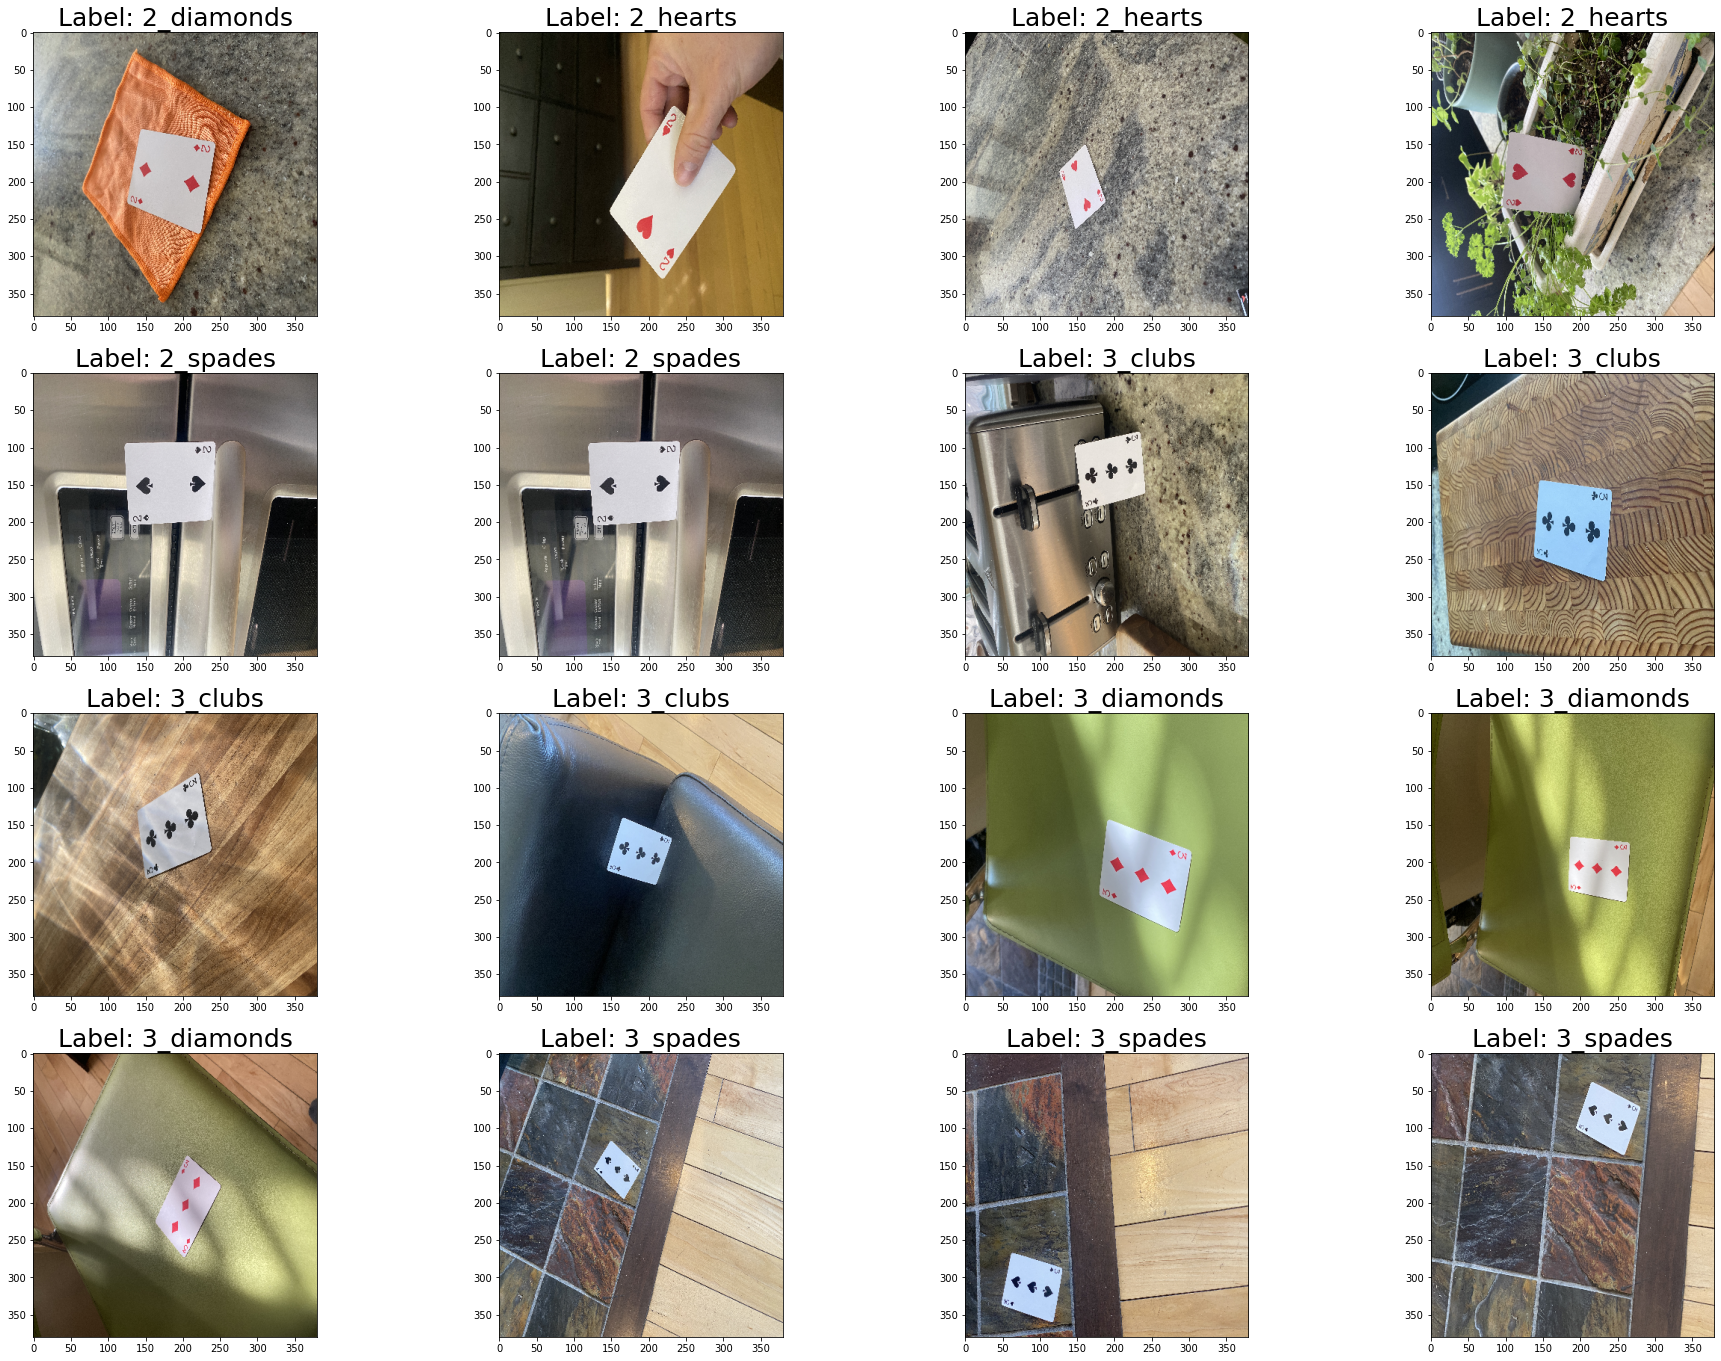

In [43]:
plt.figure(figsize = (32,24))
Xbatch,Ybatch = test_generator.__getitem__(1)

for ii in range(int(bs)):
    plt.subplot(4,4,ii+1)
    plt.imshow((Xbatch[ii]- Xbatch[ii].min())/(Xbatch.max() - Xbatch[ii].min()), cmap = "gray")
    class_idx = int(Ybatch[ii].argmax())
    plt.title("Label: {}".format(classes_names[class_idx]), fontsize=25)
plt.show()

In [31]:
predict = model.predict(test_generator, verbose = 1)


15/15 [==============================] - 11s 758ms/step


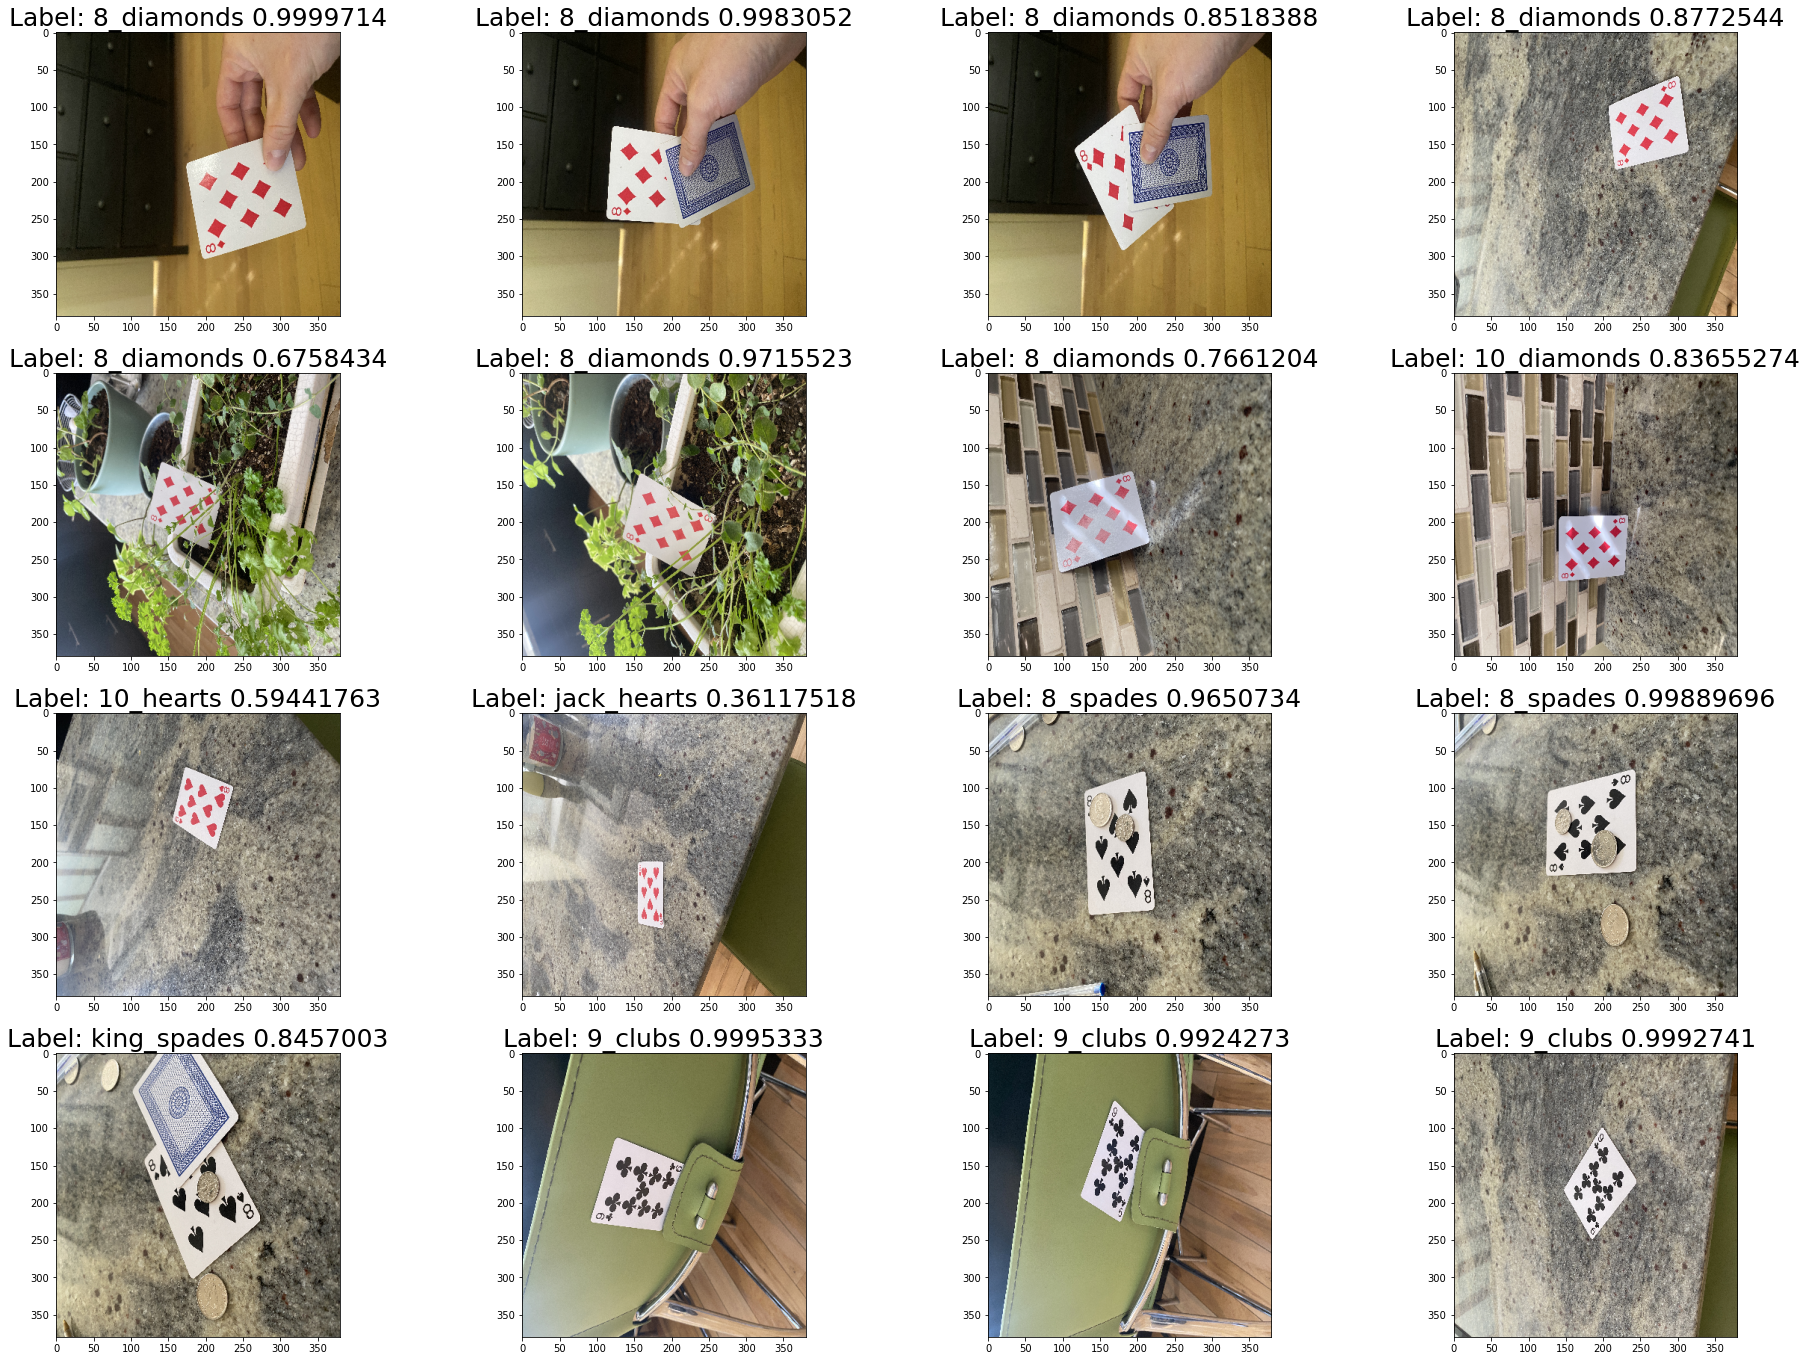

In [35]:
plt.figure(figsize = (32,24))
batch_num = 7
Xbatch,Ybatch = test_generator.__getitem__(batch_num)

for ii in range(int(bs)):
    plt.subplot(4,4,ii+1)
    plt.imshow((Xbatch[ii]- Xbatch[ii].min())/(Xbatch.max() - Xbatch[ii].min()), cmap = "gray")
    class_idx = int(predict[ii +(batch_num*bs)].argmax())
    plt.title("Label: {}".format(classes_names[class_idx] + " " + str(predict[ii +(batch_num*bs)].max())), fontsize=25)
plt.show()


In [55]:
eval = model.evaluate(test_generator, verbose = 1)

15/15 [==============================] - 15s 766ms/step - loss: 1.7620 - accuracy: 0.7100


In [ ]:
import pandas as pd
pred_value = np.max(predict,axis = 1)
pred_idx = (np.argmax(predict,axis = 1)).astype(int).transpose()
pred_class = [classes_names[i] for i in pred_idx]
df = pd.DataFrame(data=pred_idx,columns= ['idx'])
df['pred_class'] = pred_class
df['pred_value'] =  pred_value
df['file_name'] = filenames
df.head()

In [ ]:
df.to_csv('dataset_new_test.csv', index=True)

## Single image test

In [ ]:
from keras.preprocessing import image
img_path  = "dataset_test_hard/king_hearts/IMG_7008.jpg"
img = image.load_img(img_path, target_size=(img_width, img_height))
plt.figure(figsize = (10,10))
plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])


In [ ]:
pred = model.predict(images, batch_size=10, verbose =1)
print('Predicted card:',classes_names[np.argmax(pred)])
print('certainty', pred[0][np.argmax(pred)]*100,"%")